# Symbolic Computation with SymPy
<img src="../img/sympy.png" alt="guido"  height="150" align="left"> 

Symbolic computation (also called computer algebra) emphasizes exact computation where mathematical expressions and objects are represented by algebraic formulas, and not numbers. SymPy is the python module suitable for symbolic computation. See [Sympy Modules Reference](http://docs.sympy.org/dev/modules/index.html).

In [23]:
from sympy import *
import numpy as np
import bokeh.plotting as bk
from bokeh.plotting import output_notebook
init_printing()


In [24]:
output_notebook()

## 1 Basic manipulation

In [25]:
a, b, c = symbols('a, b, c')
exp1 = pi*( a*b*b+2*b*a*b )**c
exp1

We can add assumpions to symbols

In [26]:
k = symbols('k', real=True, positive=True)
k > 0

Rational numbers

In [27]:
r1 = Rational(5,6)
r2 = Rational(7,3)
r1+r2

The expression may be calculated by substituting numerical values to given variables (in this case --> a,b):

In [28]:
exp1.evalf(subs={a:6e-3, b:3, c:2})

We can combine expressions and Numpy arrays

However, this kind of numerical evolution can be very slow, and there is a much more efficient way to do it: Use the function `lambdify` to "compile" a Sympy expression into a function that is much more efficient to evaluate numerically:

In [30]:
f = lambdify([b], exp1, 'numpy')
y_vec = f(b_vec)

## 2 Solve

Algebraically solve equations or systems of equations (expr = 0)

In [31]:
x, y, z = symbols("x y z")
e = (x+y)*40-(z-x)/0.5
e

In [32]:
solve(e)

## 3 Algebra

### 3.1 Expand and Factor

In [33]:
exp2 = (x+1)*sin(x+2)*tanh(x+3)
exp2

In [34]:
expand(exp2)

The `expand` function takes a number of keywords arguments which we can tell the functions what kind of expansions we want to have performed. For example, to expand trigonometric expressions, use the `trig=True` keyword argument (see `help(sym.expand)` for more info):

In [35]:
expand(exp2, trig=True)

The opposite a product expansion is of course factoring. The factor an expression in SymPy use the `factor` function: 

In [36]:
factor(x**3 + 6 * x**2 + 11*x + 6)

### 3.2 Symplify

The `simplify` tries to simplify an expression into a nice looking expression, using various techniques. More specific alternatives to the `simplify` functions also exists: `trigsimp`, `powsimp`, `logcombine`, etc. 

The basic usages of these functions are as follows:

In [37]:
simplify(sin(x)**2 + cos(x)**2)

In [38]:
simplify(sin(x)/cos(x))

### 3.3 apart and together

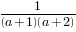

In [39]:
exp3 = 1/((a+1)*(a+2))
exp3

In [40]:
apart(exp3)

In [41]:
exp4 = 1/(a+2) + 1/(a+3)
exp4

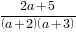

In [42]:
together(exp4)

## 4 Calculus

### 4.1 Differentiation and Integration

In [43]:
exp2

In [44]:
diff(exp2)

In [45]:
exp4

In [46]:
integrate(exp3, a)

In [47]:
integrate(exp(-x**2), (x, -oo, oo))

### 4.2 Sum and Products

In [48]:
n = Symbol("n")
exp5 = 1/n**2
exp5

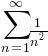

In [49]:
Sum(exp5, (n, 1, oo))

In [50]:
Sum(exp5, (n, 1, oo)).evalf()

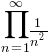

In [51]:
Product(exp5, (n, 1, oo))

### 4.3 Limits

In [52]:
limit(1/x, x, 0, dir="+")

In [53]:
limit(1/x, x, 0, dir="-")

### 4.4 Series

By default it expands the expression around $x=0$, but we can expand around any value of $x$ by explicitly include a value in the function call. It's possible to specify to which order the series expansion should be carried out:

In [54]:
exp6 = exp(x)
series(exp6, x)

In [55]:
series(exp(x), x, 1, 10)

## 6 Solving Equations

In [64]:
exp7 = x**4 - x**2 - a
exp7

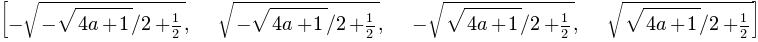

In [65]:
solve(exp7,x)

---

Visit [www.add-for.com](<http://www.add-for.com/IT>) for more tutorials and updates.

This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>.